***Neural Network & Deep Leaning Final Project***

In [62]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [63]:
normal_folder = 'Normal_Sperm'
abnormal_folder = 'Abnormal_Sperm'
non_sperm_folder = 'Non-Sperm'

In [64]:
# Function to load and resize images from a folder
def load_and_resize_images_from_folder(folder, label, target_size=(128, 128)):
    images = []
    labels = []
    
    # Loop over the images in the folder
    for filename in os.listdir(folder):
        if filename.endswith('.bmp'):
            img_path = os.path.join(folder, filename)
            
            # Open the image using PIL
            img = Image.open(img_path)
            
            # Resize the image to a consistent shape
            img = img.resize(target_size)
            
            # Convert the image to a numpy array and normalize pixel values to range [0, 1]
            img_array = np.array(img) / 255.0  # Normalization
            
            images.append(img_array)
            labels.append(label)
    
    return images, labels

In [65]:
# Load and preprocess the images from each folder
normal_images, normal_labels = load_and_resize_images_from_folder(normal_folder, 0)  # 0 for normal sperm
abnormal_images, abnormal_labels = load_and_resize_images_from_folder(abnormal_folder, 1)  # 1 for abnormal sperm
non_sperm_images, non_sperm_labels = load_and_resize_images_from_folder(non_sperm_folder, 2)  # 2 for non sperm

In [66]:
# Combine all images and labels
all_images = np.array(normal_images + abnormal_images + non_sperm_images)
all_labels = np.array(normal_labels + abnormal_labels + non_sperm_labels)

In [67]:
# Shuffle the dataset (optional)
indices = np.random.permutation(all_images.shape[0])
all_images = all_images[indices]
all_labels = all_labels[indices]

In [68]:
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(all_images, all_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [69]:
# Print the shape of the data
print(f'Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}')

Training set: (2100, 128, 128, 3), Validation set: (450, 128, 128, 3), Test set: (450, 128, 128, 3)


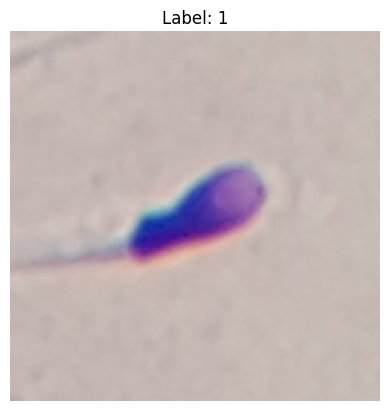

In [70]:
# Visualize a sample image
plt.imshow(X_train[0])
plt.title(f'Label: {y_train[0]}')
plt.axis('off')
plt.show()

Implementation of tensorflow framework

In [71]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [72]:
# Define the model architecture
def create_cnn_model(input_shape=(128, 128, 3), num_classes=3):
    model = models.Sequential()
    
    # 1st Convolutional Block
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # 2nd Convolutional Block
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # 3rd Convolutional Block
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # 4th Convolutional Block
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    
    # Flatten the feature maps into a 1D vector
    model.add(layers.Flatten())
    
    # Dense layer with Dropout for regularization
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    
    # Output layer with softmax for multi-class classification
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

In [73]:
# Create the model
model = create_cnn_model()

C:\Users\Léonard\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,568,579 (5.98 MB)

 Trainable params: 1,568,579 (5.98 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
# Reshape the training, validation, and test data to match the input shape (height, width, channels)
X_train = X_train.reshape(-1, 128, 128, 3)
X_val = X_val.reshape(-1, 128, 128, 3)
X_test = X_test.reshape(-1, 128, 128, 3)

In [76]:
# Set device to CPU
with tf.device('/CPU:0'):
    history = model.fit(
        X_train, y_train, 
        epochs=20, 
        batch_size=128, 
        validation_data=(X_val, y_val),
        verbose=1
    )

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.3604 - loss: 1.0980 - val_accuracy: 0.5133 - val_loss: 0.9548
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5797 - loss: 0.8934 - val_accuracy: 0.6733 - val_loss: 0.7929
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6828 - loss: 0.7772 - val_accuracy: 0.6733 - val_loss: 0.7558
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6889 - loss: 0.7278 - val_accuracy: 0.6511 - val_loss: 0.7917
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7166 - loss: 0.6829 - val_accuracy: 0.6756 - val_loss: 0.7148
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7443 - loss: 0.6421 - val_accuracy: 0.7289 - val_loss: 0.6795
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7560 - loss: 0.6164 - val_accuracy: 0.7311 - val_loss: 0.6879
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7649 - loss: 0.6205 - val_accuracy: 0.7622 - val_loss:

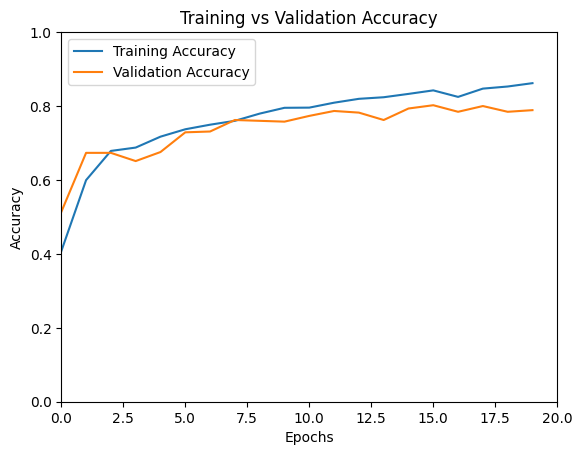

In [77]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Label the axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Set the axis limits from 0 to 1
plt.axis([0, len(history.history['accuracy']), 0, 1])

# Add legend and title
plt.legend()
plt.title('Training vs Validation Accuracy')

# Show the plot
plt.show()


In [78]:
# Save the trained model for later use
model.save('sperm_classification_model.h5')

In [85]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-4)

In [86]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

In [87]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=300,        # Reduce rotation range
    width_shift_range=0.5,    # Smaller horizontal shift
    height_shift_range=0.5,   # Smaller vertical shift
    horizontal_flip=True      # Random horizontal flip
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation

# Create generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=256)
val_generator = val_datagen.flow(X_val, y_val, batch_size=256)


In [90]:
with tf.device('/CPU:0'):
    history = model.fit(
        X_train, y_train, 
        epochs=30, 
        batch_size=256, 
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[early_stop, lr_scheduler]
    )

MemoryError: Unable to allocate 394. MiB for an array with shape (2100, 128, 128, 3) and data type float32

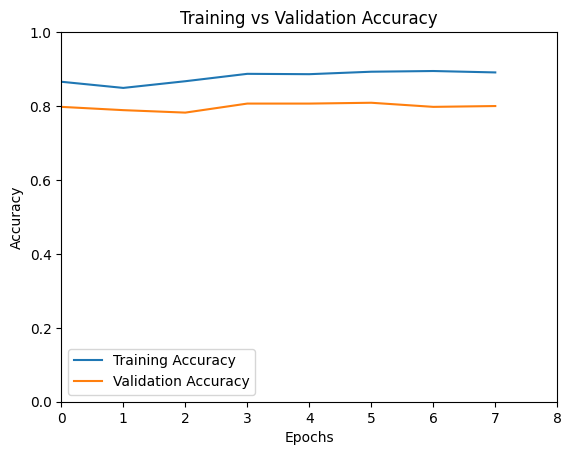

In [83]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Label the axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Set the axis limits from 0 to 1
plt.axis([0, len(history.history['accuracy']), 0, 1])

# Add legend and title
plt.legend()
plt.title('Training vs Validation Accuracy')

# Show the plot
plt.show()
